In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('pre_processed_data.csv')

In [3]:
dfm=data[['ADV_socialmedia','ADV_online_blogs','ADV_other_parents','ADV_books_magazines','ADV_doctors','ADV_teachers']].melt(var_name='advice_from', value_name='response')

C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

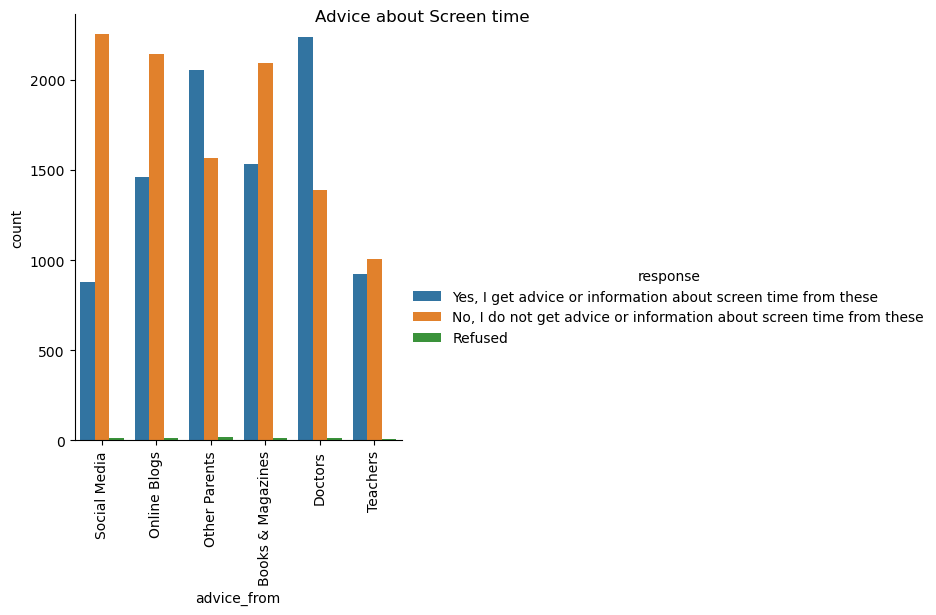

In [4]:
g1=sns.catplot(x='advice_from',hue='response',data=dfm,kind='count')
g1.fig.suptitle('Advice about Screen time')
g1.set_xticklabels(labels=['Social Media','Online Blogs','Other Parents','Books & Magazines','Doctors','Teachers'],rotation=90)

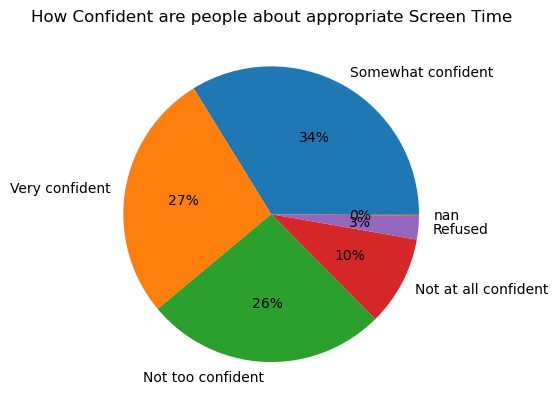

In [5]:
plt.pie(data['Confidence_abt_screen_time'].value_counts(dropna=False).tolist(),labels=data['Confidence_abt_screen_time'].unique().tolist(),autopct='%1.0f%%')
plt.title('How Confident are people about appropriate Screen Time')
plt.show()

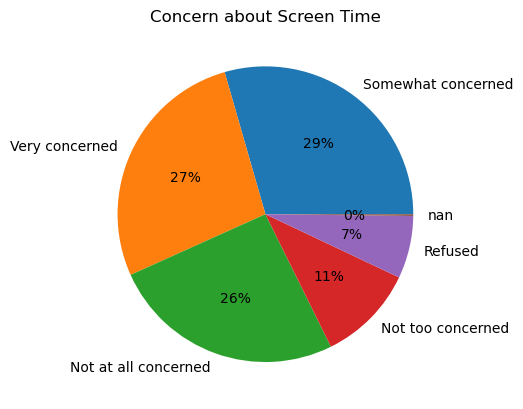

In [6]:
plt.pie(data['CO_screen_time'].value_counts(dropna=False).tolist(),labels=data['CO_screen_time'].unique().tolist(),autopct='%1.0f%%')
plt.title('Concern about Screen Time')
plt.show()

In [7]:
map_age_to_age_groups={'0':'0-2','1':'0-2','2':'0-2','3':'3-5','4':'3-5','5':'3-5','6':'6-11','7':'6-11','8':'6-11','9':'6-11','10':'6-11','11':'6-11'}
data['Child_age_groups']=data['Child_age_0_11'].map(map_age_to_age_groups)

In [33]:
data.groupby('Child_age_groups')['Uses_youtube'].value_counts()

Child_age_groups  Uses_youtube                                 
0-2               Yes, my child watches videos on YouTube           303
                  No, my child does not watch videos on YouTube     247
                  Refused                                             1
3-5               Yes, my child watches videos on YouTube           532
                  No, my child does not watch videos on YouTube     105
6-11              Yes, my child watches videos on YouTube          1310
                  No, my child does not watch videos on YouTube     130
                  Refused                                             1
Name: count, dtype: int64

C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

"y_ticks=list(map(int,g2.get_yticks()))\npercent_labels=[i/len(data['Child_age_groups']) for i in y_ticks]\ng2.set_yticklabels(percent_labels)"

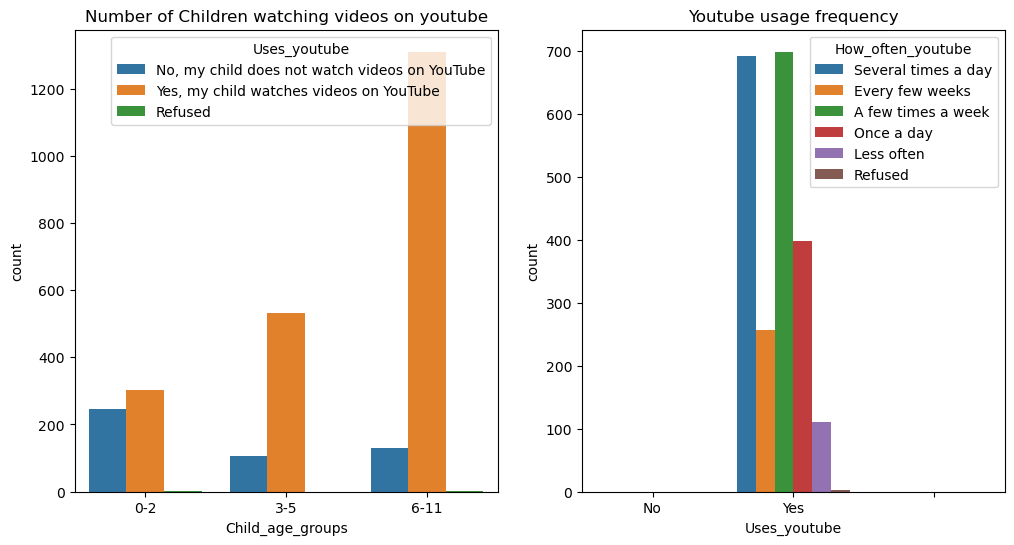

In [63]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=data,x='Child_age_groups',hue='Uses_youtube',order=['0-2','3-5','6-11'],ax=ax[0])
ax[0].set_title('Number of Children watching videos on youtube')
sns.countplot(x='Uses_youtube',hue='How_often_youtube',ax=ax[1],data=data)
ax[1].set_title('Youtube usage frequency')
ax[1].set_xticklabels(labels=['No','Yes',''])
'''y_ticks=list(map(int,g2.get_yticks()))
percent_labels=[i/len(data['Child_age_groups']) for i in y_ticks]
g2.set_yticklabels(percent_labels)'''

plt.pie(data['Uses_youtube'].value_counts(dropna=False).tolist(),labels=data['Uses_youtube'].unique().tolist(),autopct='%1.0f%%')
plt.title('Proportion of Children watching videos on youtube')

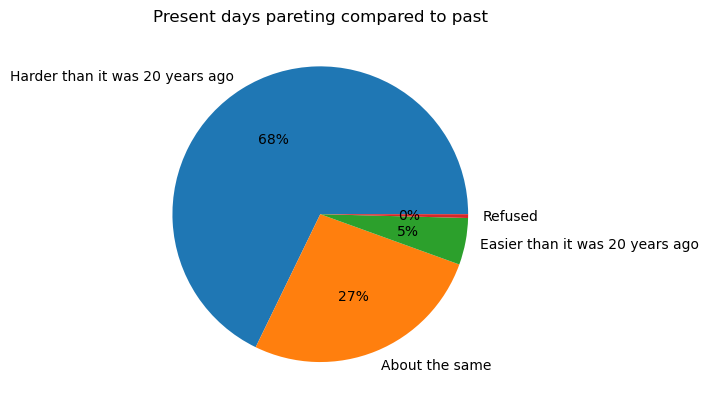

In [9]:
plt.pie(data['How_is_curret_days_parenting'].value_counts(dropna=False).tolist(),labels=data['How_is_curret_days_parenting'].unique().tolist(),autopct='%1.0f%%')
plt.title('Present days pareting compared to past')
plt.show()

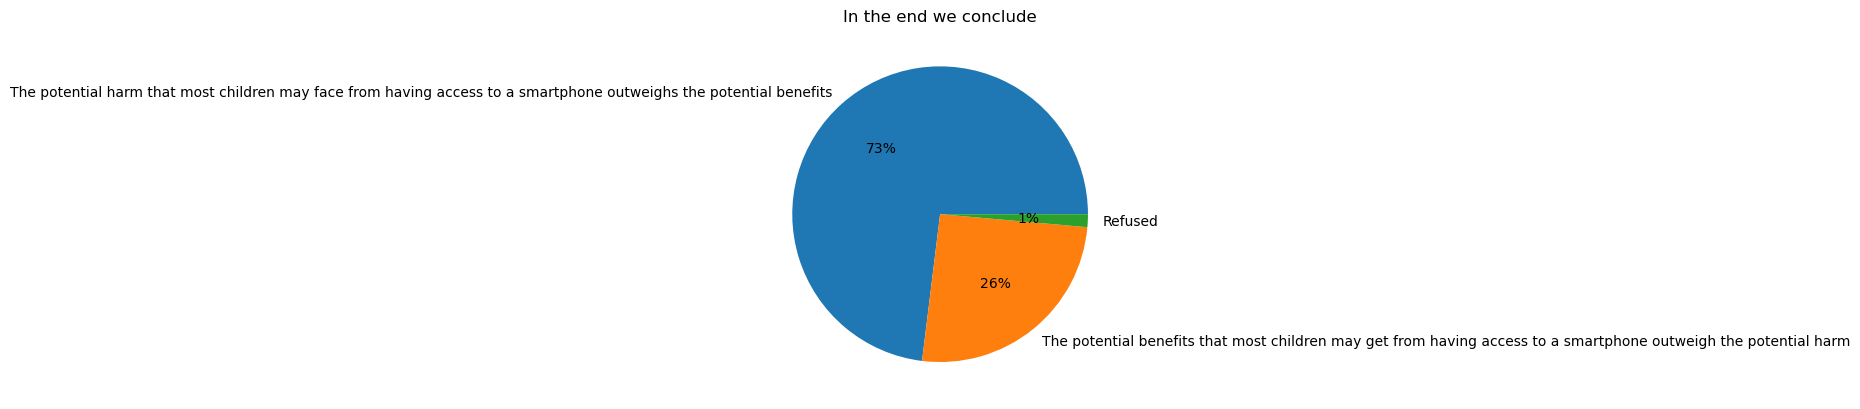

In [10]:
plt.pie(data['Harm_vs_benifits'].value_counts(dropna=False).tolist(),labels=data['Harm_vs_benifits'].unique().tolist(),autopct='%1.0f%%')
plt.title('In the end we conclude')
plt.show()

C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'In the end we conclude')

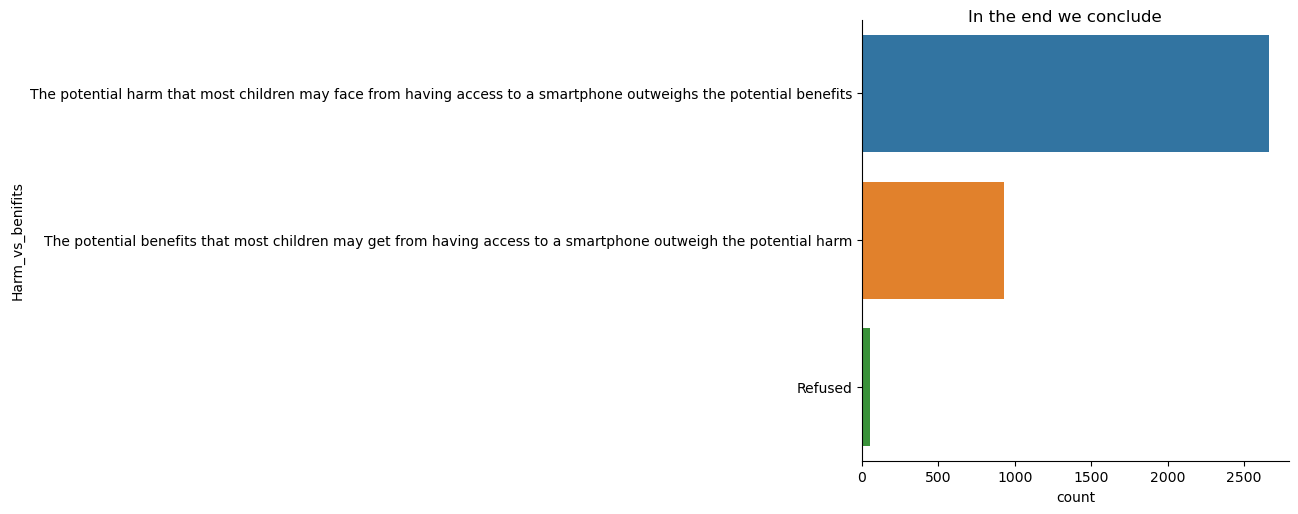

In [11]:
g3=sns.catplot(data=data,y='Harm_vs_benifits',kind='count')
g3.fig.suptitle('In the end we conclude')

In [12]:
dfm1=data[['ACCEPT_own_smartphone','ACCEPT_own_tablet_computer']].melt(var_name='Accept_having _smartphone',value_name='Response')

C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

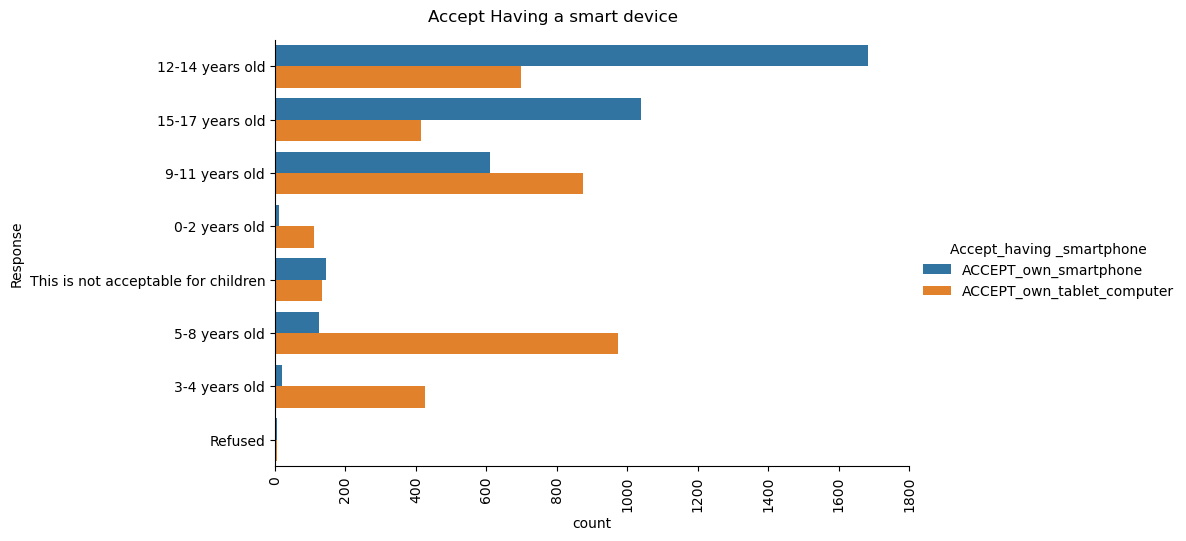

In [24]:
g4=sns.catplot(hue='Accept_having _smartphone',y='Response',data=dfm1,kind='count',height=5,aspect=2)
g4.fig.suptitle('Accept Having a smart device',y=1.03)
g4.set_xticklabels(rotation=90)

In [65]:
dfm3=data[['MNT_websites','MNT_take_away_mobile','MNT_screentime','MNT_call_records','MNT_parental_controls','MNT_socialmedia','MNT_gps']].melt(var_name='monitor_child_activities',value_name='through')

C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

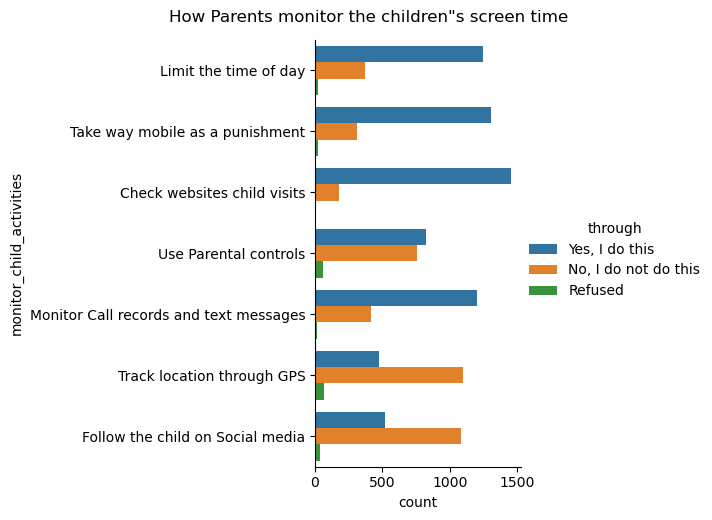

In [67]:
g5=sns.catplot(y='monitor_child_activities',hue='through',data=dfm3,kind='count')
g5.fig.suptitle('How Parents monitor the children"s screen time',y=1.03)
g5.set_yticklabels(labels=['Limit the time of day','Take way mobile as a punishment','Check websites child visits','Use Parental controls','Monitor Call records and text messages','Track location through GPS','Follow the child on Social media'])

In [78]:
pd.pivot_table(index=['P_race','How_often_distracted'],columns='P_education_level',values='P_age_categories',aggfunc='count',data=data,fill_value=0)

P_education_level                        Associate's degree  \
P_race             How_often_distracted                       
Black non-Hispanic Never                                  4   
                   Often                                  6   
                   Rarely                                10   
                   Refused                                1   
                   Sometimes                             13   
Hispanic           Never                                  3   
                   Often                                 25   
                   Rarely                                29   
                   Refused                                0   
                   Sometimes                             55   
Other              Never                                  1   
                   Often                                  3   
                   Rarely                                 5   
                   Refused                                0   
                   Sometimes                              4   
Refused            Never                                  1   
                   Often                                  0   
                   Rarely                                 0   
                   Sometimes                              1   
White non-Hispanic Never                                 13   
                   Often                                 34   
                   Rarely                                48   
                   Refused                                1   
                   Sometimes                            113   

P_education_level                        College graduate/some post grad  \
P_race             How_often_distracted                                    
Black non-Hispanic Never                                               6   
                   Often                                              23   
                   Rarely                                             20   
                   Refused                                             1   
                   Sometimes                                          29   
Hispanic           Never                                               6   
                   Often                                              43   
                   Rarely                                             48   
                   Refused                                             1   
                   Sometimes                                         121   
Other              Never                                               4   
                   Often                                              22   
                   Rarely                                             12   
                   Refused                                             0   
                   Sometimes                                          40   
Refused            Never                                               3   
                   Often                                               1   
                   Rarely                                              0   
                   Sometimes                                           6   
White non-Hispanic Never                                              22   
                   Often                                             123   
                   Rarely                                            132   
                   Refused                                             1   
                   Sometimes                                         373   

P_education_level                        High school graduate  \
P_race             How_often_distracted                         
Black non-Hispanic Never                                    3   
                   Often                                    3   
                   Rarely                                  16   
                   Refused                                 

dfm4=data[['P_race','P_education_level','How_often_distracted']].melt(var_name='Distraction',value_name='How_often')

C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

[Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Refused')]

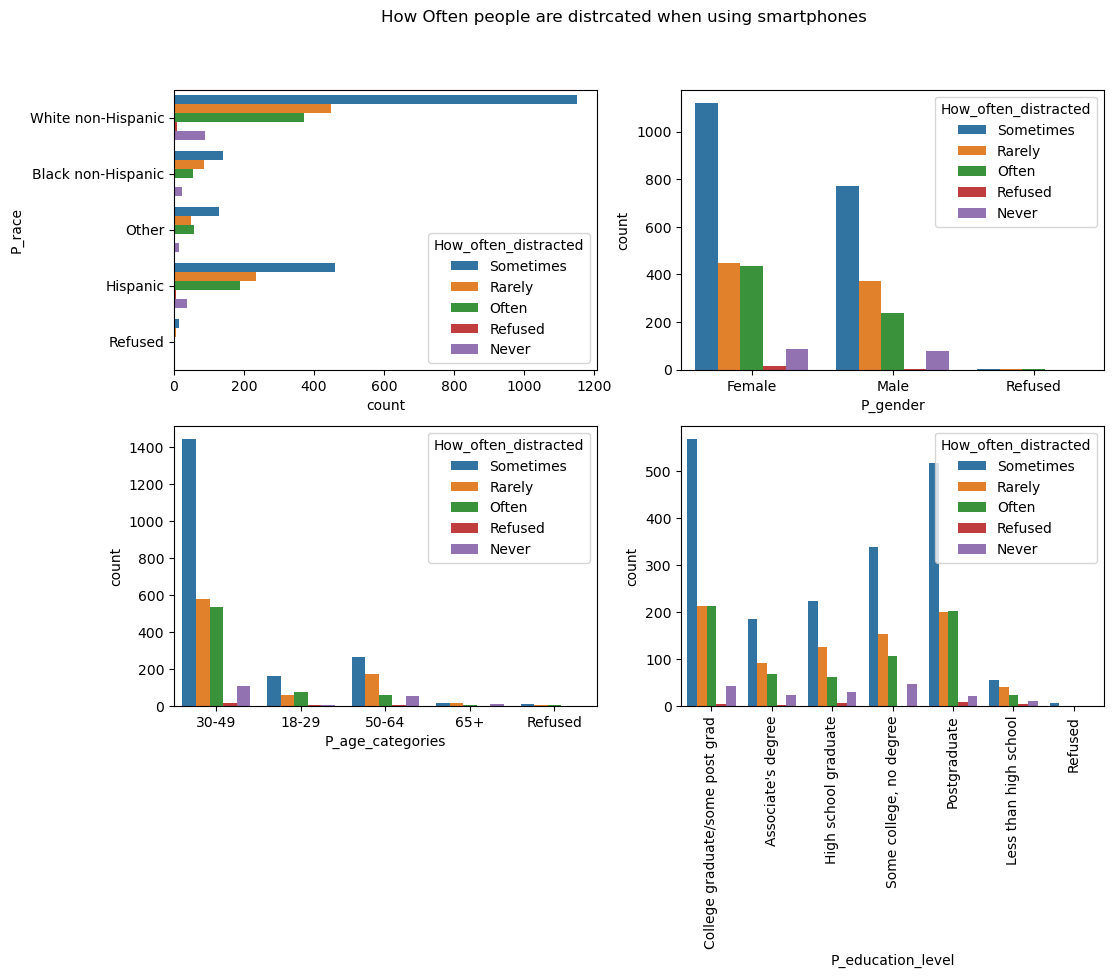

In [114]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.countplot(ax=ax[0,0],data=data,y='P_race',hue='How_often_distracted')
ax[0,0].set_yticklabels(labels=data['P_race'].unique().tolist())
sns.countplot(ax=ax[1,1],data=data,x='P_education_level',hue='How_often_distracted')
ax[1,1].set_xticklabels(labels=data['P_education_level'].unique().tolist(),rotation=90)
fig.suptitle('How Often people are distrcated when using smartphones')
sns.countplot(ax=ax[1,0],data=data,x='P_age_categories',hue='How_often_distracted')
ax[1,0].set_xticklabels(labels=data['P_age_categories'].unique().tolist())
sns.countplot(ax=ax[0,1],data=data,x='P_gender',hue='How_often_distracted')
ax[0,1].set_xticklabels(labels=data['P_gender'].unique().tolist())
